# Refernece

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

#  Data

In [11]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150,
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5,
                  random_state=0)

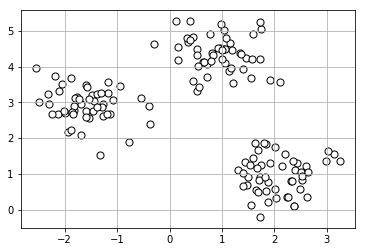

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = 'white', 
            marker = 'o',
            edgecolor = 'black', 
            s=50)
plt.grid()
plt.show()

# 分割式方法 (partitioning)

## 1. KMeans

* 在獨立不同、隨機選取的質心，執行 K-means 演算法10次，並以最低SSE的模型作為最終模型
* 某些情況下可能不會收斂，處理此問題的方法是選擇最大的tol值
* 若在使用「歐式距離」來計算時，要記得做標準化
* max_iter: 指定每次執行的最大迭代次數
* tol: 控制「集群內誤差平方和」的「可容許誤差」

In [3]:
'''
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit_transform(X)
'''

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)
#y_scaler_km = km.fit_predict(X_scaler)

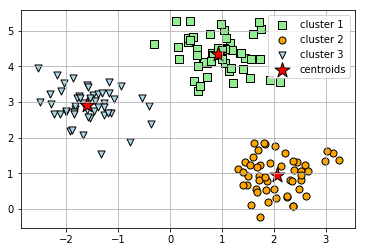

In [4]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c = 'lightgreen',
            marker = 's',
            edgecolor = 'black',
            label = 'cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c = 'orange',
            marker = 'o',
            edgecolor = 'black',
            label = 'cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c = 'lightblue',
            marker = 'v',
            edgecolor = 'black',
            label = 'cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, 
            marker = '*',
            c = 'red',
            edgecolor = 'black', 
            label = 'centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## 2. KMeans++

* 在實作中，強烈建議使用k-means++
* 目前scikit-learn中，並沒有實作FCM(fuzzy C-means)，但有研究指出實務上，k-means和FCM會產生很類似的群集輸出。  
S. Ghosh and S. K. Dubey, “Comparative Analysis of k-means and
Fuzzy C-Means Algorithms”, ĲACSA, 4: 35-38, 2013.

In [5]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X) 

# 階層式群集

## 1. Complete

* method: 選擇不同的群集距離。'complete', 'single', 'average'

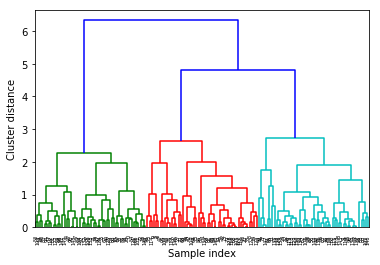

"\nfrom sklearn.cluster import AgglomerativeClustering\n\n\nac = AgglomerativeClustering(linkage = 'complete',\n                             affinity = 'euclidean',\n                             n_clusters = 3)\nlabels = ac.fit_predict(X)\n"

In [8]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram


Complete = linkage(X, method = 'complete', metric = 'euclidean')
dendrogram(Complete)
ax = plt.gca()
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')
plt.show()

'''
from sklearn.cluster import AgglomerativeClustering


ac = AgglomerativeClustering(linkage = 'complete',
                             affinity = 'euclidean',
                             n_clusters = 3)
labels = ac.fit_predict(X)
'''

## 2. Ward

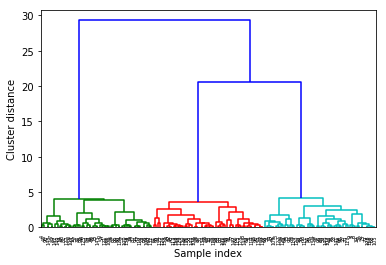

In [10]:
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram


linkage = ward(X)
dendrogram(linkage)
ax = plt.gca()
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')
plt.show()

# K-means VS Complete linkage

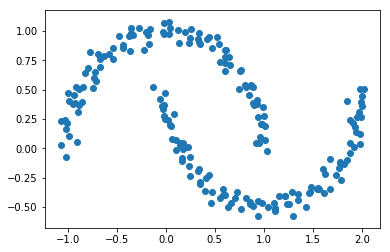

In [22]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

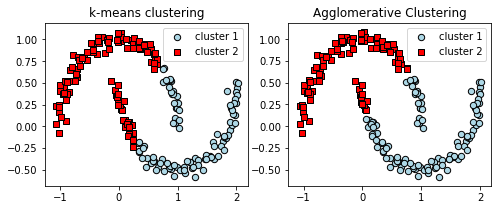

In [23]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2,
           init = 'random')
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=40, c = 'lightblue',
            marker = 'o', edgecolor = 'black',
            label = 'cluster 1')
ax1.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=40, c = 'red',
            marker = 's',edgecolor = 'black',
            label = 'cluster 2')
ax1.set_title('k-means clustering')

ac = AgglomerativeClustering(linkage = 'complete',
                             affinity = 'euclidean',
                            n_clusters = 2)
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c = 'lightblue', 
            edgecolor = 'black', marker = 'o', s=40, label = 'cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c = 'red', 
            edgecolor = 'black', marker = 's', s=40, label = 'cluster 2')
ax2.set_title('Agglomerative Clustering')

ax1.legend()
ax2.legend()
plt.show()

# 密度式群集

## 1. DBSCAN

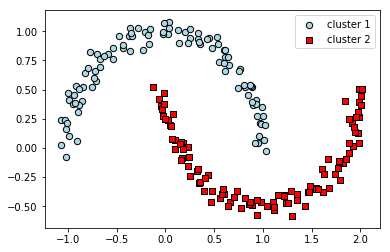

In [25]:
from sklearn.cluster import DBSCAN 


db = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c = 'lightblue', marker = 'o', s=40,
            edgecolor = 'black',
            label = 'cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c = 'red', marker = 's', s=40, 
            edgecolor = 'black',
            label = 'cluster 2')
plt.legend()
plt.show()

# 轉折判斷法判斷K值(群聚數目)

* 評估一個集群好壞的指標「群內誤差平方和」，使用「轉折判斷法」來來估計最佳的k。直觀上，如果聚類數⽬目k增加，失真就會減少，因為樣本會更更接近他們被分配到的質心。「轉折判斷法」的想法：找出失真開始迅速增加的聚類數⽬目k，所以曲線上的第一個（或最重要的）轉折點就建議為“正確”的群集數目。
* inertia_: 群內誤差平方和

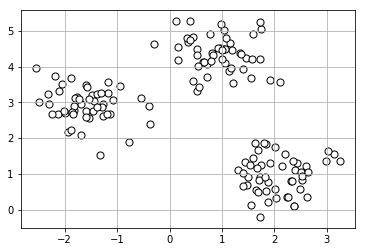

In [27]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)
plt.scatter(X[:, 0], X[:, 1], 
            c = 'white', marker = 'o', edgecolor = 'black', s=50)
plt.grid()
plt.show()

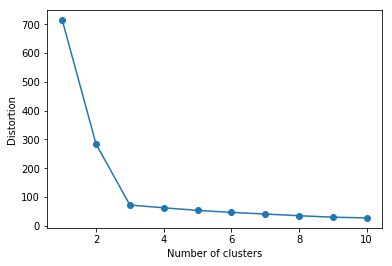

In [28]:
from sklearn.cluster import KMeans


distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# 側影圖分析 (silhouette analysis)

In [29]:
import numpy as np
from matplotlib import cm 
from sklearn.metrics import silhouette_samples


km = KMeans(n_clusters=3, 
            init = 'k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

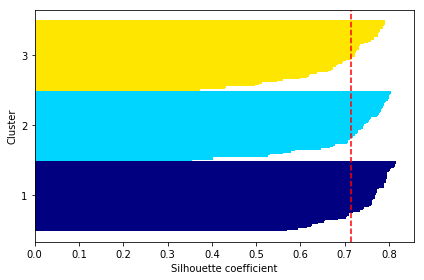

In [30]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
             height=1.0, edgecolor = 'none', color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

## 在階層樹狀狀圖中結合熱度圖

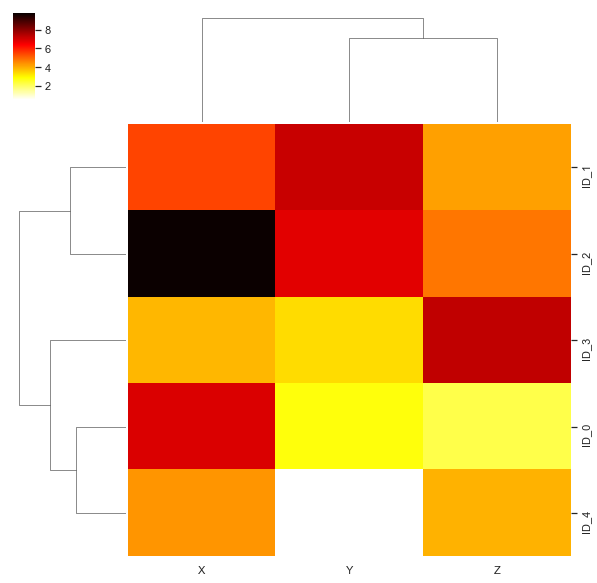

In [31]:
import pandas as pd
import numpy as np


np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns = variables, index = labels)

from seaborn import clustermap
import seaborn as sns
sns.set(color_codes = True)
g = sns.clustermap(df, cmap = 'hot_r', method = 'complete')